<a href="https://colab.research.google.com/github/in-seixas/in-seixas_data_science-/blob/master/Projeto_Suic%C3%ADdio_no_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Aproveitando a campanha de prevenção ao suicídio para aperfeiçar os conhecimentos iniciais de Data Science utilizando python.***





In [ ]:
#Importando bibliotecas necessárias

from google.colab import drive
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#montando drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Saber onde estamos
os.getcwdb()

b'/content'

In [ ]:
#Mudar o diretório

os.chdir('/content/gdrive/My Drive')

In [ ]:
#analisar o que tem dentro do diretório

os.listdir()

['master.csv',
 'DistribuicaoCloroquinaOseltamivir.xlsx',
 'Colab Notebooks',
 'modelo_de_relatorio.pdf',
 '__MACOSX',
 'relatorios',
 'Modulo_3.notebooks',
 'medicamento.txt']

In [ ]:
#Abrir arquivo de interesse
 
df = pd.read_csv('/content/gdrive/My Drive/master.csv')

In [ ]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [ ]:
suicides_brazil = df[df['country'] == 'Brazil']

suicides_brazil.columns




Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

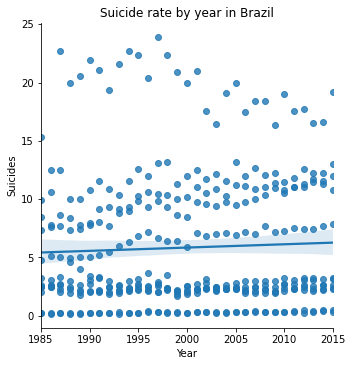

In [ ]:
#Esse primeiro gráfico mostra a distribuição da taxa de suicidio no Brasil no período de 1985 a 2015.
#Destacando-se o número crescente de suicidio com o decorrer dos anos


sns.lmplot(x="year", y="suicides/100k pop", data=suicides_brazil)
plt.title('Suicide rate by year in Brazil')
plt.xlabel('Year')
plt.ylabel('Suicides');

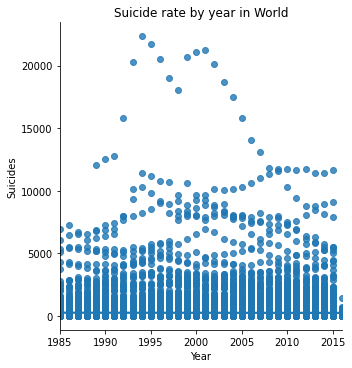

In [ ]:
#Esse outro gráfico mostra a distribuição da taxa de suicidio no Mundo no período de 1985 a 2015.
#É possível verificar que um número abrangente de casos (n>=10000), permaneceu estável ao longo do período,
#com algumas elevações em anos específicos.

sns.lmplot(x="year", y="suicides_no",   data=df);
plt.title('Suicide rate by year in World')
plt.xlabel('Year')
plt.ylabel('Suicides');

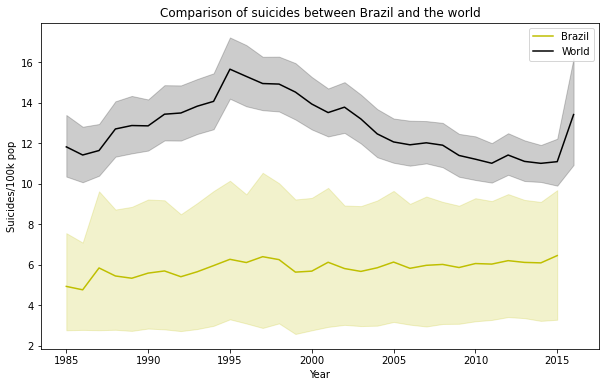

In [ ]:



plt.figure(figsize = (10, 6))

sns.lineplot(x=suicides_brazil['year'], y=suicides_brazil['suicides/100k pop'], color='y', label='Brazil')
sns.lineplot(x=df['year'],  y=df['suicides/100k pop'], color='k', label='World')
plt.title('Comparison of suicides between Brazil and the world')
plt.xlabel('Year')
plt.ylabel('Suicides/100k pop');



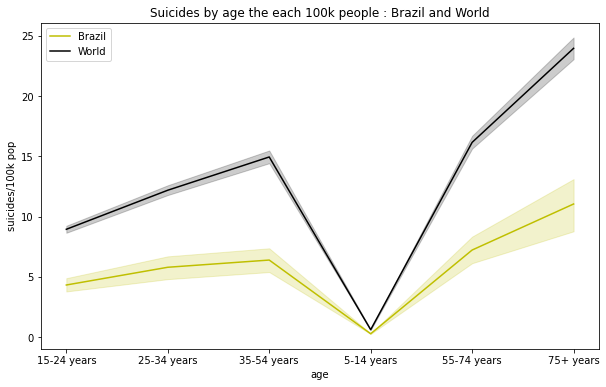

In [ ]:
plt.figure(figsize = (10, 6))

sns.lineplot(x=suicides_brazil['age'], y=suicides_brazil['suicides/100k pop'], color = 'y', label='Brazil')

sns.lineplot(x=df['age'],  y=df['suicides/100k pop'], color = 'k', label='World')


plt.title('Suicides by age the each 100k people : Brazil and World')

plt.legend();


In [ ]:
data = dict(suicides_brazil.groupby('sex')['suicides_no'].sum())
data

{'female': 49015, 'male': 177598}

In [ ]:
!pip install pywaffle

In [ ]:
from pywaffle import Waffle


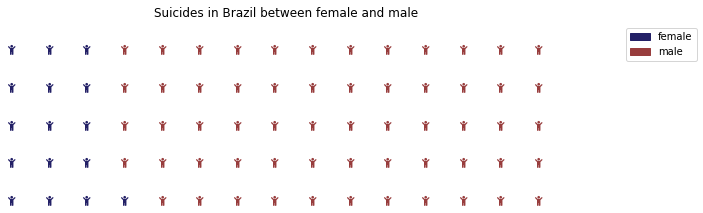

In [ ]:
#Nesse gráfico de Waffle é perceptível maior número de casos na população masculina. 


fig = plt.figure(figsize=(10,6),
                FigureClass=Waffle,
                rows=5,
                columns=15,
                values=data,
                colors=("#232066", "#983D3D"),
                icons='child', icon_size=10,
                legend={'loc': 'upper left',
                        'bbox_to_anchor': (1.1, 1)}
                
                )

fig.set_tight_layout(False)
plt.title('Suicides in Brazil between female and male')
plt.show()

In [ ]:
age = suicides_brazil.groupby('age')['suicides_no'].sum()

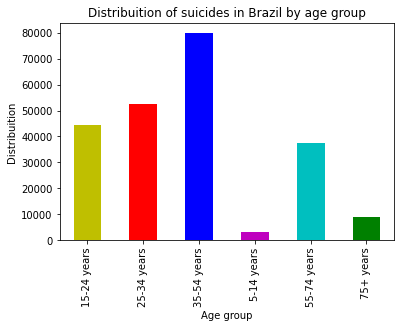

In [ ]:
colors_bar = ['y', 'r', 'b', 'm', 'c', 'g']

x = age.plot(kind = 'bar', color = colors_bar)
plt.title('Distribuition of suicides in Brazil by age group')
plt.ylabel('Distribuition')
plt.xlabel('Age group')
plt.show()



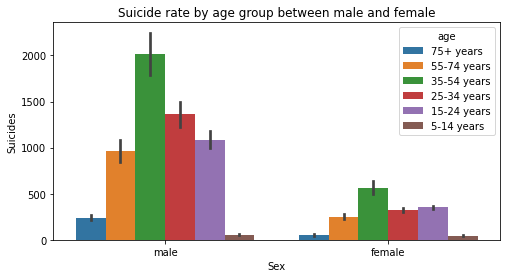

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(x='sex', y = 'suicides_no', hue='age', data=suicides_brazil)
plt.title('Suicide rate by age group between male and female')
plt.ylabel('Suicides')
plt.xlabel('Sex')
plt.show()

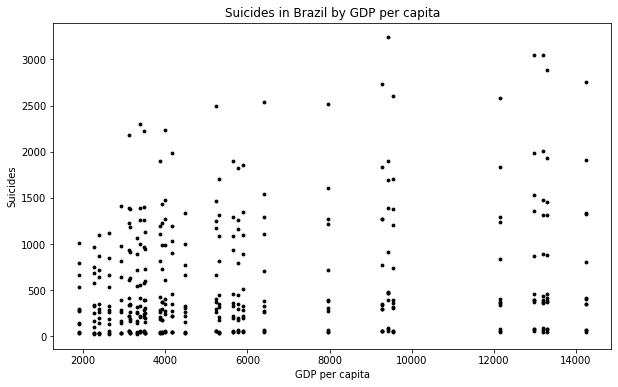

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(x='gdp_per_capita ($)', y='suicides_no', color = 'k', s=8, data=suicides_brazil)
plt.title('Suicides in Brazil by GDP per capita')
plt.ylabel('Suicides')
plt.xlabel('GDP per capita');